© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

**Important Note on Figures**:
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, Nature Reviews Methods Primers, in press**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

**Disclaimer**:
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/Fig1_intro_figure.pdf'


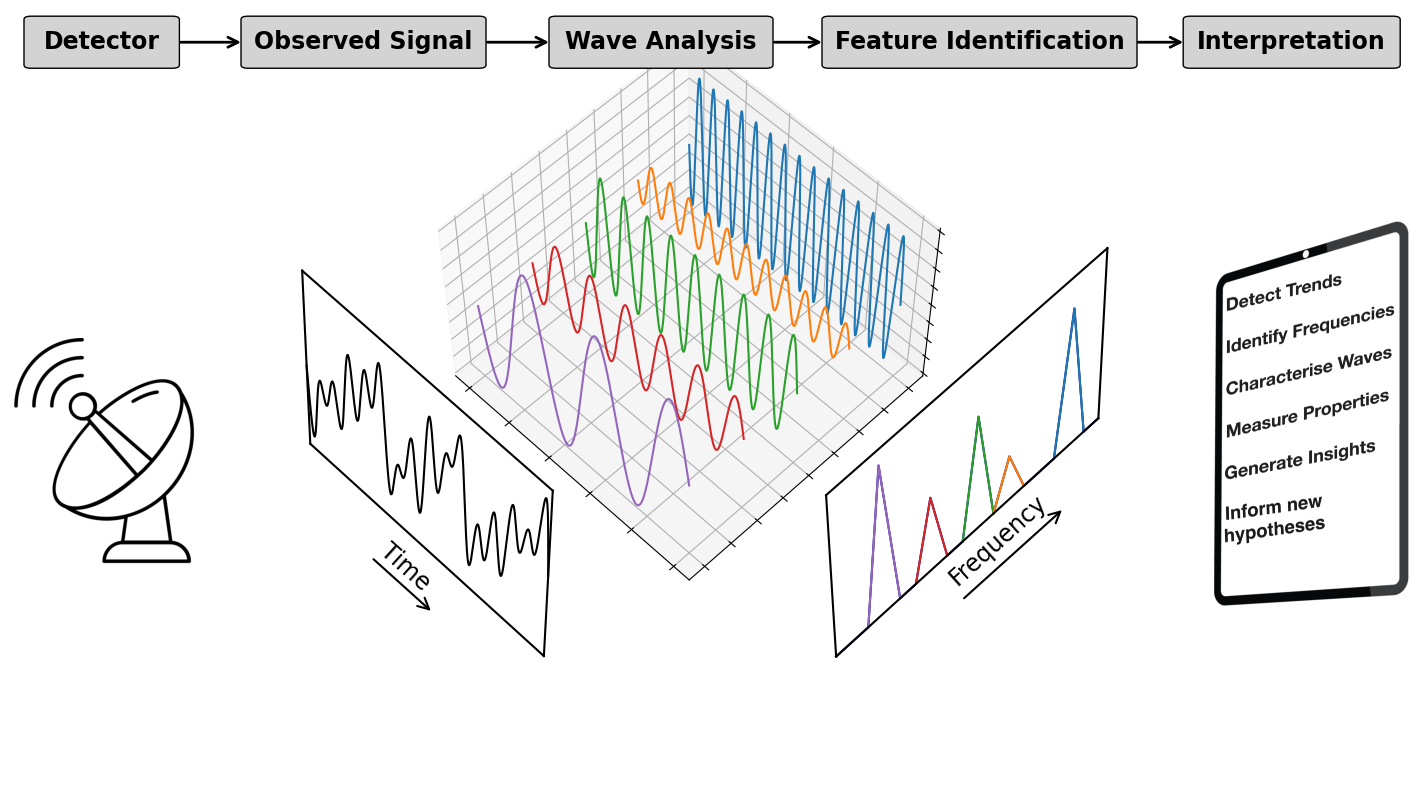

In [2]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy.fft import fft, fftfreq # type: ignore
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch # type: ignore
import matplotlib.transforms as transforms # type: ignore
from WaLSAtools import WaLSA_save_pdf # type: ignore

# Set up the parameters for the waves
sampling_rate = 1000  # Samples per second
T = 1.0 / sampling_rate  # Sample spacing
N = 1000  # Number of samples

# Generate time points
x = np.linspace(0.0, N*T, N, endpoint=False)

# Define the frequencies and amplitudes of the individual waves
frequencies = [3, 6, 9, 11, 15]
amplitudes = [1, 0.5, 0.75, 0.3, 0.9]

# Generate the individual waves
individual_waves = [amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * x) for i in range(5)]

# Sum the individual waves to create the composite wave
composite_wave = np.sum(individual_waves, axis=0)

# Perform Fourier Transform to get the power spectrum
yf = fft(composite_wave)
xf = fftfreq(N, T)[:N//2]
power_spectrum = 2.0/N * np.abs(yf[:N//2])

# Create the figure
fig = plt.figure(figsize=(14, 6.5))
fig.patch.set_alpha(0.0)  # Set figure background to transparent

# Load and display the image without axes
image = plt.imread('Images/radio_telescope.png')  # Replace with your image file path
ax_img = fig.add_axes([0.002, 0.12, 0.13, 0.40])  # [left, bottom, width, height]
ax_img.imshow(image)
ax_img.axis('off')  # Hide the axis

#--------------------------------------------------------------------------
# Plot the 3D visualization of individual waves
ax2 = fig.add_axes([0.29, 0.10, 0.38, 0.87], projection='3d')
wave_colors = []
for i, wave in enumerate(individual_waves[::-1]):  # Reverse the order of individual waves
    y = np.full_like(x, i)  # Set y coordinate for each wave
    plot = ax2.plot(x, y, wave, label=f'Wave {5-i} (f={frequencies[4-i]}Hz)')  # Adjust labels accordingly
    wave_colors.append(plot[0].get_color())  # Capture the color used for the wave

# ax2.set_title('Individual Waves')

# Hide axis values (tick labels) for ax2
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_zticklabels([])

# Set axis background to transparent
ax2.patch.set_alpha(0.0)

ax2.view_init(elev=55, azim=135)  # Adjusted angle to prevent overlap

#--------------------------------------------------------------------------
# Plot the composite wave (superposition of individual waves)
left, bottom, width, height = 0.06, -0.205, 0.46, 0.98
ax1 = fig.add_axes([left, bottom, width, height], projection='3d')
# Plot the composite signal on a tilted plane
y = np.zeros_like(x)
ax1.plot(x, y, composite_wave, color='black', label='Composite Signal')
# Remove background color, grid, and axes
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.grid(False)
ax1.set_axis_off()

# Set axis background to transparent
ax1.patch.set_alpha(0.0)

ax1.plot([x[0], x[-1]], [0, 0], [-3, -3], color='black')
ax1.plot([x[0], x[-1]], [0, 0], [3, 3], color='black')
ax1.plot([x[0], x[0]], [0, 0], [-3, 3], color='black')
ax1.plot([x[-1], x[-1]], [0, 0], [-3, 3], color='black')

ax1.view_init(elev=55, azim=137.5)

# Draw an arrow
start_x = 0.43  # X position of the start of the arrow (axes fraction)
start_y = 0.37  # Y position of the start of the arrow (axes fraction)
angle_degrees = -42  # Angle relative to the x-axis (in degrees)
arrow_length = 0.13  # Length of the arrow (axes fraction units)

# Calculate the end position using angle and length
angle_radians = np.radians(angle_degrees)
end_x = start_x + arrow_length * np.cos(angle_radians)
end_y = start_y + arrow_length * np.sin(angle_radians)

ax1.annotate(
    '', 
    xy=(end_x, end_y), 
    xytext=(start_x, start_y), 
    xycoords='axes fraction', 
    arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5, mutation_scale=20)
)

# Place the text at the start of the arrow, offset slightly for better visibility
# Offset the text slightly in a direction perpendicular to the arrow direction
offset_x = -0.01 * np.sin(angle_radians)  # Perpendicular offset in x
offset_y = -0.02 * np.cos(angle_radians)  # Perpendicular offset in y

# Convert axes fraction coordinates to figure coordinates
x_fig = (start_x + offset_x) * width + left
y_fig = (start_y + offset_y) * height + bottom

# Add the text at the start of the arrow, with rotation equal to the arrow's angle
fig.text(
    x=x_fig,  # x position in figure coordinates
    y=y_fig,  # y position in figure coordinates
    s='Time',  # Text content
    fontsize=17,
    rotation=angle_degrees,  # Align text with the arrow
    ha='left',  # Horizontal alignment
    va='center',  # Vertical alignment
)

#--------------------------------------------------------------------------
# Plot the FFT power spectrum
# ax3 = fig.add_subplot(133, projection='3d')
left, bottom, width, height = 0.45, -0.177, 0.46, 0.96
ax3 = fig.add_axes([left, bottom, width, height], projection='3d') 
yyy = np.zeros_like(xf)
valid_indices = xf <= 17
ax3.plot(xf[valid_indices], yyy[valid_indices], power_spectrum[valid_indices], color='navy', label='FFT Power Spectrum')

for i, (freq, color) in enumerate(zip(frequencies, wave_colors[::-1])):
    peak_region = (xf >= freq - 1) & (xf <= freq + 1)
    ax3.plot(xf[peak_region], yyy[peak_region], power_spectrum[peak_region], color=color, label=f'Peak {i+1}')

ax3.xaxis.pane.fill = False
ax3.yaxis.pane.fill = False
ax3.zaxis.pane.fill = False
ax3.grid(False)
ax3.set_axis_off()
ax3.set_xlim(17, 0)
# ax3.set_title('FFT Power Spectrum')
# ax3.set_xlabel('Frequency [Hz]')
# ax3.set_ylabel('Power')

# Set axis background to transparent
ax3.patch.set_alpha(0.0)

ax3.plot([0, 17], [0, 0], [0, 0], color='black')
ax3.plot([0, 17], [0, 0], [1.1, 1.1], color='black')
ax3.plot([xf[0], xf[0]], [0, 0], [0, 1.1], color='black')
ax3.plot([17, 17], [0, 0], [0, 1.1], color='black')

ax3.view_init(elev=55, azim=42.5)  # Adjusted angle to prevent overlap

# Draw an arrow
start_x = 0.50  # X position of the start of the arrow (axes fraction)
start_y = 0.28  # Y position of the start of the arrow (axes fraction)
angle_degrees = 42  # Angle relative to the x-axis (in degrees)
arrow_length = 0.22  # Length of the arrow (axes fraction units)

# Calculate the end position using angle and length
angle_radians = np.radians(angle_degrees)
end_x = start_x + arrow_length * np.cos(angle_radians)
end_y = start_y + arrow_length * np.sin(angle_radians)

ax3.annotate(
    '', 
    xy=(end_x, end_y), 
    xytext=(start_x, start_y), 
    xycoords='axes fraction', 
    arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5, mutation_scale=20)
)

# Place the text at the start of the arrow, offset slightly for better visibility
# Offset the text slightly in a direction perpendicular to the arrow direction
offset_x = -0.04 * np.sin(angle_radians)  # Perpendicular offset in x
offset_y = 0.13 * np.cos(angle_radians)  # Perpendicular offset in y

# Convert axes fraction coordinates to figure coordinates
x_fig = (start_x + offset_x) * width + left
y_fig = (start_y + offset_y) * height + bottom

# Add the text at the start of the arrow, with rotation equal to the arrow's angle
fig.text(
    x=x_fig,  # x position in figure coordinates
    y=y_fig,  # y position in figure coordinates
    s='Frequency',  # Text content
    fontsize=17,
    rotation=angle_degrees,  # Align text with the arrow
    ha='left',  # Horizontal alignment
    va='center',  # Vertical alignment
)

#--------------------------------------------------------------------------
# Create an axes for the flowchart on top
ax_flow = fig.add_axes([0, 0, 1, 1], zorder=10)
ax_flow.axis('off')

# Create the flowchart
flowchart_elements = [
    {'text': 'Detector', 'pos': (0.05, 0.95), 'size': (0.031, 0.0001)},
    {'text': 'Observed Signal', 'pos': (0.205, 0.95), 'size': (0.095, 0.0001)},
    {'text': 'Wave Analysis', 'pos': (0.425, 0.95), 'size': (0.08, 0.0001)},
    {'text': 'Feature Identification', 'pos': (0.62, 0.95), 'size': (0.145, 0.0001)},
    {'text': 'Interpretation', 'pos': (0.878, 0.95), 'size': (0.075, 0.0001)}
]

for element in flowchart_elements:
    # Create the rounded-corner rectangle
    bbox = FancyBboxPatch(element['pos'], element['size'][0], element['size'][1],
                          boxstyle="round,pad=0.04,rounding_size=0.005", edgecolor='black', facecolor='lightgray')
    ax_flow.add_patch(bbox)
    # Add the text
    ax_flow.text(element['pos'][0] + element['size'][0] / 2, element['pos'][1] + element['size'][1] / 2,
            element['text'], ha='center', va='center', fontsize=17, fontweight='bold')  # Adjust the fontsize as needed

# Add arrows between the flowchart elements
for i in range(len(flowchart_elements) - 1):
    start_pos = (flowchart_elements[i]['pos'][0] + flowchart_elements[i]['size'][0] +0.039, 
                 flowchart_elements[i]['pos'][1] + flowchart_elements[i]['size'][1] / 2)
    end_pos = (flowchart_elements[i + 1]['pos'][0] - 0.038, 
               flowchart_elements[i + 1]['pos'][1] + flowchart_elements[i + 1]['size'][1] / 2)
    arrow = FancyArrowPatch(start_pos, end_pos, arrowstyle='->', mutation_scale=18, color='black', lw=2)
    ax_flow.add_patch(arrow)

# Load and display the tablet image without axes
image = plt.imread('Images/tablet.png')  # Replace with your image file path
ax_img = fig.add_axes([0.845, 0.08, 0.17, 0.60])  # [left, bottom, width, height]
ax_img.imshow(image)
ax_img.axis('off')  # Hide the axis


image2 = plt.imread('Images/intro_image_text.png')  # Replace with your image file path
ax_img_text = fig.add_axes([0.843, 0.09, 0.16, 0.60])  # [left, bottom, width, height]
ax_img_text.imshow(image2)
ax_img_text.axis('off')  # Hide the axis

#--------------------------------------------------------------------------
# Manually adjust the bbox to remove white space from the bottom
bbox = transforms.Bbox([[0, 0], [14, 6.5]])  # (left, bottom) to (right, top)

# Save the figure as a single PDF
pdf_path = 'Figures/Fig1_intro_figure.pdf'
WaLSA_save_pdf(fig, pdf_path, color_mode='CMYK', dpi=300, bbox_inches=bbox, pad_inches=0)

plt.show()